### Problem Statement

Sales Prediction for Big Mart Outlets The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Data Dictionary We have train (8523) and test (5681) data set, train data set has both input and output variable(s)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [23]:
train = pd.read_csv("W:\Sales_preds\data_files\Train.csv")


In [24]:
# Preview First 05 Rows of the Data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
train.dropna(inplace=True)

In [26]:
from category_encoders import OrdinalEncoder

In [27]:
cats = [cols for cols in train.columns if train[cols].dtypes == 'O']

In [28]:
oe=OrdinalEncoder(cols=cats,return_df=True)

In [32]:
c=oe.fit_transform(train)

C:\Users\mayur\anaconda3\envs\GPU\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [33]:
c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,1,0.016047,1,249.8092,1,1999,1,1,1,3735.1380
1,2,5.920,2,0.019278,2,48.2692,2,2009,1,2,2,443.4228
2,3,17.500,1,0.016760,3,141.6180,1,1999,1,1,1,2097.2700
4,4,8.930,1,0.000000,4,53.8614,3,1987,2,2,1,994.7052
5,5,10.395,2,0.000000,5,51.4008,2,2009,1,2,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,314,20.750,4,0.083607,10,178.8318,4,1997,3,1,1,3608.6360
8518,196,6.865,1,0.056783,6,214.5218,3,1987,2,2,1,2778.3834
8520,626,10.600,1,0.035186,9,85.1224,5,2004,3,3,1,1193.1136
8521,587,7.210,2,0.145221,6,103.1332,2,2009,1,2,2,1845.5976


In [30]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [31]:
nums=['Item_Weight','Item_MRP','Item_Visibility']

In [34]:
c[nums]=mm.fit_transform(c[nums])

In [35]:
c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,0.282525,1,0.085212,1,0.927446,1,1999,1,1,1,3735.1380
1,2,0.081274,2,0.102368,2,0.071280,2,2009,1,2,2,443.4228
2,3,0.770765,1,0.088997,3,0.467837,1,1999,1,1,1,2097.2700
4,4,0.260494,1,0.000000,4,0.095036,3,1987,2,2,1,994.7052
5,5,0.347723,2,0.000000,5,0.084583,2,2009,1,2,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,314,0.964275,4,0.443954,10,0.625925,4,1997,3,1,1,3608.6360
8518,196,0.137541,1,0.301522,6,0.777541,3,1987,2,2,1,2778.3834
8520,626,0.359929,1,0.186840,9,0.227837,5,2004,3,3,1,1193.1136
8521,587,0.158083,2,0.771127,6,0.304349,2,2009,1,2,2,1845.5976


### Steps to Modelling

1. Problem Statement

2. Hypothesis Generation

3. Exploratory Data Analysis

3.1. Univariate Analysis

3.2. Bivariate or Multivariate Analysis

3.3. Missing Values Treatment

3.4. Outlier Identification

3.5. Feature Engineering

3.6. Standardization - This is the last Step of EDA popularly known as Data Pre-Processing Step.


### Exploratory Data Analysis

1. Univariate Analysis

In [84]:
# Target Variable
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [85]:
sns.distplot(train.Item_Outlet_Sales, color = "m")
plt.show()

NameError: name 'sns' is not defined

Item_Outlet_Sales is Positively Skewed

In [86]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [87]:
sns.distplot(train.Item_Visibility, color = "red");

NameError: name 'sns' is not defined

Visibility is Higher for lot of Items.

In [88]:
sns.distplot(train.Item_Weight.dropna(), color = "g");

NameError: name 'sns' is not defined

In [89]:
sns.distplot(train.Item_MRP, color = "r");

NameError: name 'sns' is not defined

MRP appears to have 04 diff dist/values. Needs exploring

In [90]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [91]:
# Replacement of LF and low fat
train.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], 
                              value = ["Low Fat", "Low Fat"], inplace=True)


In [92]:
# Replacing reg into Regular
train.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"], 
                              inplace = True)

<AxesSubplot:>

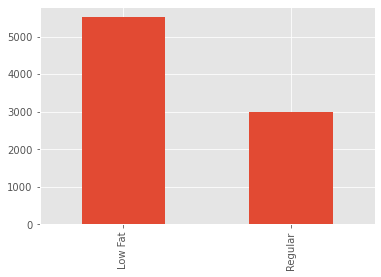

In [93]:
# Item Fat Content
train.Item_Fat_Content.value_counts().plot(kind = "bar")

NameError: name 'sns' is not defined

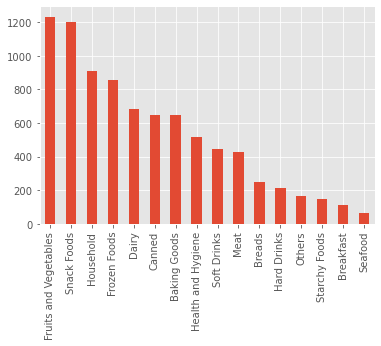

In [94]:
# Item Fat Content
train.Item_Type.value_counts().plot(kind = "bar")

# By Sns
sns.countplot(x = "Item_Type", data = train)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sns.countplot(x = "Item_Type", data = train)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Outlet _Identifier
train.Outlet_Identifier.value_counts().plot(kind = "bar")

Less Frequency Count is of OUT10 and OUT19

In [ ]:
# Outlet _Size
train.Outlet_Size.value_counts().plot(kind = "bar")

Medium Outlets are the most visible outlets

In [ ]:
# Outlet_Type
train.Outlet_Type.value_counts().plot(kind = "bar");

Most of the Outlet Types are S

### Bivariate Analysis

1. Num vs Num - Scatterplot

2. Cat Vs Num - Boxplot (Statistical Plot) | Violin Plot

3. Cat Vs Cat - pd.crosstab | Table - Frequency

In [95]:
# Num vs Num
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


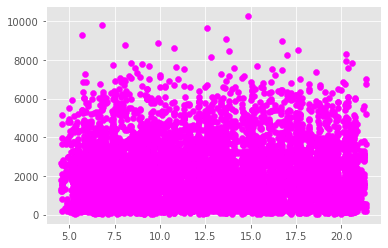

In [96]:
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, color = "magenta");

No pattern as such between the duo

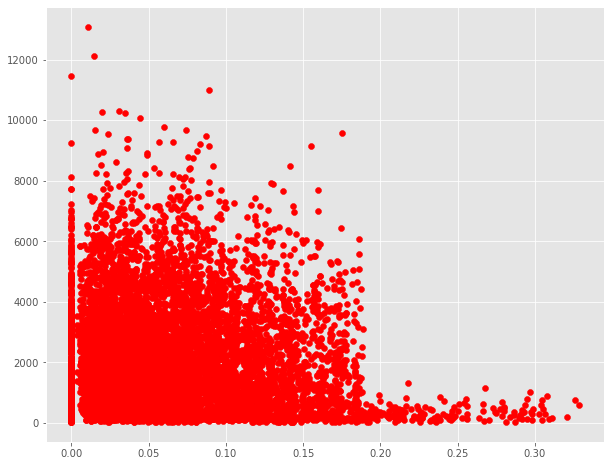

In [97]:
plt.figure(figsize = [10, 8])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "red");

Lots of 0s in Visibility for which the sales exist.

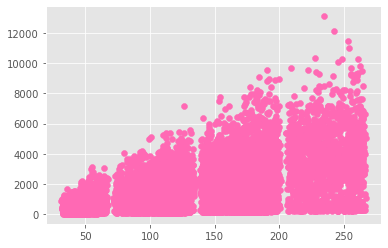

In [98]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = "hotpink")
# Price Per Unit

In [99]:
# Cat Vs Numerical
sns.boxplot(train.Item_Fat_Content, train.Item_Outlet_Sales)

NameError: name 'sns' is not defined

In [ ]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T
# Hint: Refer Empirical Rule and Contradictory Rule - Chebyshev Inequality

In [ ]:
# Cat Vs Numerical
plt.figure(figsize = [13,6])
sns.boxplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Item Type Vs Sales")
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Cat Vs Numerical
plt.figure(figsize = [13,6])
sns.boxplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Oultet ID Vs Sales")
plt.xlabel("Outlets")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Outlet Size
# Cat Vs Numerical
plt.figure(figsize = [13,6])
sns.boxplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Oultet Size Vs Sales")
plt.xlabel("Outlets")
plt.ylabel("Sales")
plt.show()

In [ ]:
pd.DataFrame(train.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()).T

In [100]:
# Missing Value
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [101]:
weightna = train[train.Item_Weight.isnull()]

In [102]:
weightna.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [103]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [104]:
# Pattern
train[train.Item_Identifier=="FDX07"]["Item_Visibility"].median()

# Missing value Imputation
train.loc[29, "Item_Weight"]= train[train.Item_Identifier=="FDC14"]["Item_Weight"].median()

# Finding ID | np.where(train.Item_Weight.isna())
ids = train[pd.isnull(train.Item_Weight)]["Item_Identifier"]
locs = ids.index # Finding Index of the Item Weight Missing Values

# Missing Value Final Code
for i in range(0, len(ids)):
    train.loc[locs[i],"Item_Weight"]=train[train.Item_Identifier==ids.values[i]]["Item_Weight"].median()

Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice


In [105]:
# Missing Value Imputation - Item Weight | Lambda
train["Item_Weight"]=train.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.median()))

Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice


In [106]:
# Missing Values - Item Visibility
train["Item_Visibility"] = train.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0,value = x.median()))

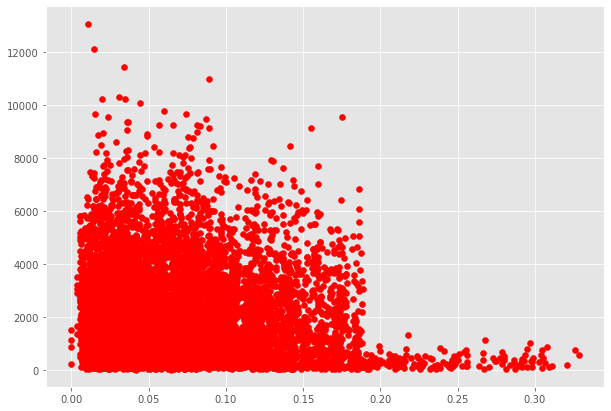

In [107]:
plt.figure(figsize = [10,7])
plt.scatter(train["Item_Visibility"],train["Item_Outlet_Sales"], color = "red")

In [108]:
train[train["Item_Identifier"]=="FDY07"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
651,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,46.5402,OUT010,1998,NaN,Tier 3,Grocery Store,229.7010
779,FDY07,11.8,Low Fat,0.121848,Fruits and Vegetables,46.8402,OUT045,2002,NaN,Tier 2,Supermarket Type1,597.2226
3370,FDY07,11.8,Low Fat,0.122290,Fruits and Vegetables,46.3402,OUT017,2007,NaN,Tier 2,Supermarket Type1,275.6412
4208,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.9402,OUT027,1985,Medium,Tier 3,Supermarket Type3,872.8638
4791,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.2402,OUT018,2009,Medium,Tier 3,Supermarket Type2,1148.5050
6321,FDY07,11.8,Low Fat,0.121501,Fruits and Vegetables,46.8402,OUT013,1987,High,Tier 3,Supermarket Type1,413.4618


In [109]:
train[train.Item_Identifier=="FDY07"]["Item_Visibility"]

10      0.000000
651     0.000000
779     0.121848
3370    0.122290
4208    0.000000
4791    0.000000
6321    0.121501
Name: Item_Visibility, dtype: float64

In [110]:
# Imputation of FDY 07
train.loc[(train.Item_Identifier=="FDY07") & (train["Item_Visibility"]!=0), 
        "Item_Visibility"]=0.121848

In [111]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [112]:
# Lets Deal with Tier 2
train.loc[train["Outlet_Location_Type"]=='Tier 2',"Outlet_Size"]="Small"

In [113]:
#train.loc[train["Outlet_Location_Type"]=='Tier 1',"Outlet_Size"]

In [114]:
# Feature Engineering
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [115]:
# Size
pd.DataFrame(train.groupby(["Outlet_Type", "Outlet_Location_Type"])
             ["Outlet_Size"].value_counts())

Outlet_Size
Outlet_Type       Outlet_Location_Type Outlet_Size             
Grocery Store     Tier 1               Small                528
Supermarket Type1 Tier 1               Medium               930
                                       Small                930
                  Tier 2               Small               2785
                  Tier 3               High                 932
Supermarket Type2 Tier 3               Medium               928
Supermarket Type3 Tier 3               Medium               935

Rule

1. Tier 3 and Grocery Store - Medium
2. Tier 2 and S1 - Small

When Outlet Size is NA, then the Locations are Tier 2 and Tier 3 and 'Grocery Store', 'Supermarket Type1'

In [116]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
train.dropna(how='any',inplace=True)

In [118]:
train.drop('Item_Identifier',axis=1,inplace=True)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
from sklearn.preprocessing import OrdinalEncoder

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
cats=[i for i in train.columns if train[i].dtypes=='O']

In [123]:
cats

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [124]:
nums=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

In [125]:
ms=MinMaxScaler()

In [126]:
oe=OrdinalEncoder()

In [127]:
train[cats]=oe.fit_transform(train[cats])

In [128]:
train[nums]=ms.fit_transform(train[nums])

In [129]:
y=train.pop('Item_Outlet_Sales')

In [257]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.282525,0.0,0.048866,4.0,0.927507,8.0,0.583333,1.0,0.0,1.0
1,0.081274,1.0,0.058705,14.0,0.072068,2.0,1.000000,1.0,2.0,2.0
2,0.770765,0.0,0.051037,10.0,0.468288,8.0,0.583333,1.0,0.0,1.0
4,0.260494,0.0,0.020067,9.0,0.095805,0.0,0.083333,0.0,2.0,1.0
5,0.347723,1.0,0.277403,0.0,0.085361,2.0,1.000000,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.0,0.172914,13.0,0.777729,0.0,0.083333,0.0,2.0,1.0
8519,0.227746,1.0,0.143069,0.0,0.326263,6.0,0.708333,2.0,1.0,1.0
8520,0.359929,0.0,0.107148,8.0,0.228492,5.0,0.791667,2.0,1.0,1.0
8521,0.158083,1.0,0.442219,13.0,0.304939,2.0,1.000000,1.0,2.0,2.0


In [130]:
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.3)

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [247]:
gbr=GradientBoostingRegressor()

In [249]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [319]:
x_train

array([[0.88091694, 1.        , 0.06502506, ..., 1.        , 2.        ,
        3.        ],
       [0.75290265, 0.        , 0.47669359, ..., 1.        , 0.        ,
        1.        ],
       [0.12741887, 0.        , 0.23101785, ..., 0.        , 2.        ,
        1.        ],
       ...,
       [0.78267341, 0.        , 0.53181902, ..., 1.        , 0.        ,
        1.        ],
       [0.45221792, 1.        , 0.12957854, ..., 2.        , 1.        ,
        1.        ],
       [0.93450432, 0.        , 0.11008267, ..., 1.        , 2.        ,
        3.        ]])

In [134]:
import shap

In [315]:
x=x_train[2]

In [316]:
x

array([ 0.12741887,  0.        ,  0.23101785, 15.        ,  0.68163451,
        0.        ,  0.08333333,  0.        ,  2.        ,  1.        ])

In [326]:
explainer = shap.TreeExplainer(gbr)
shap.initjs()
shap_values = explainer(x).values

In [328]:
for i in shap_values:
    print(i)

25.38397327648137
-0.0020905606803618484
-43.13125583676838
-10.20905111558512
964.6692745331632
3.0749347977302004
-1.2754008098689724
8.609875604525378
-0.5689708686903853
-49.42616698013459


In [302]:
float(explainer.shap_values(x_train[118,:])[4])

-798.3420195565677

In [246]:
shap_values.values

array([ 2.51333185e+01,  4.56316975e-02, -4.31094541e+01, -1.02003091e+01,
        9.64776706e+02,  4.75934916e+00,  7.36462556e+00,  7.05695866e+00,
       -5.73269759e-01, -5.81284344e+01])

In [141]:
shap.force_plot(explainer.expected_value, shap_values[6,:], x_train.iloc[6,:])

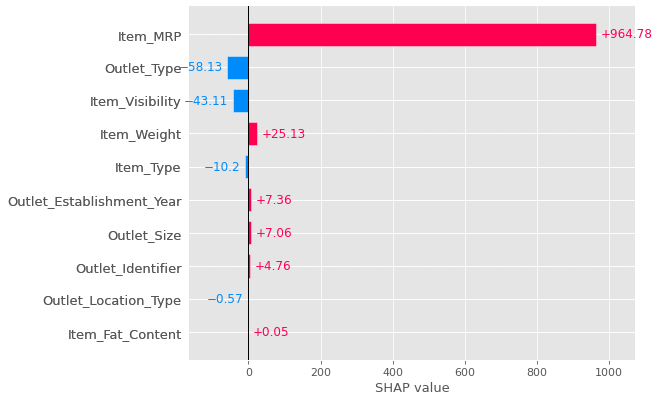

In [207]:
shap.plots.bar(shap_values[3))

In [238]:
shap_values[5]

.values =
array([ 2.27632683e+01,  4.56316975e-02, -8.59046491e+00, -3.32392411e+00,
        2.10391731e+02, -6.92396746e+01, -1.71789134e+02,  3.02520098e+00,
       -5.44322460e-01, -4.54824837e+01])

.base_values =
array([2310.62509638])

.data =
array([ 0.79160464,  0.        ,  0.14258837, 10.        ,  0.51943562,
        2.        ,  1.        ,  1.        ,  2.        ,  2.        ])

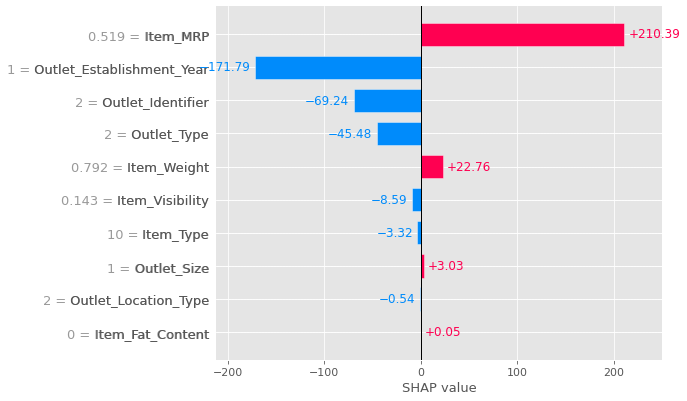

In [237]:
shap.plots.bar(shap.Explanation(shap_values[5],feature_names=x_test.columns))

In [220]:
shap.Explanation()

In [228]:
explainer.shap_values(x_train[0].reshape(1,-1))[0]

array([-4.07745831e+01, -1.18395781e-01,  6.41170656e+01,  1.87305013e+01,
       -4.01369724e+02,  2.66583076e+01, -4.71823446e+01,  7.05695866e+00,
       -5.44322460e-01,  1.29663844e+03])

In [226]:
shap.waterfall_plot(explainer.expected_value,explainer.shap_values(x_train[0].reshape(1,-1))[0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'